In [121]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from ramannoodles import spectrafit

In [122]:
# open spectra library
shoyu_data_dict = pickle.load(open('../raman_spectra/shoyu_data_dict.p', 'rb'))
# list keys
sorted(shoyu_data_dict.keys())

['2-PROPANOL',
 'CARBON DIOXIDE',
 'CARBON MONOXIDE',
 'DIMETHYL KETONE',
 'ETHYL ALCOHOL',
 'FORMALDEHYDE',
 'FORMIC ACID',
 'N-PENTANE',
 'WATER']

In [123]:
# extract spectra data
data = shoyu_data_dict['CARBON MONOXIDE']
x_data = data['x']
y_data = data['y']

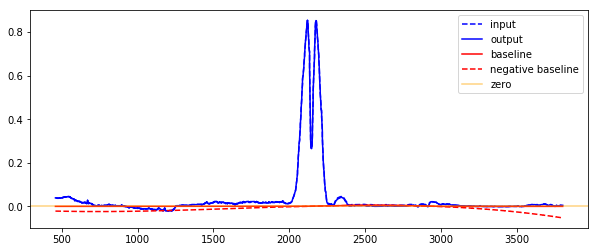

In [124]:
# subtract baseline
y_data = spectrafit.subtract_baseline(y_data, deg=3, plot=True, x_data=x_data)

In [125]:
# detect peaks
peaks, peak_list = spectrafit.peak_detect(x_data, y_data)

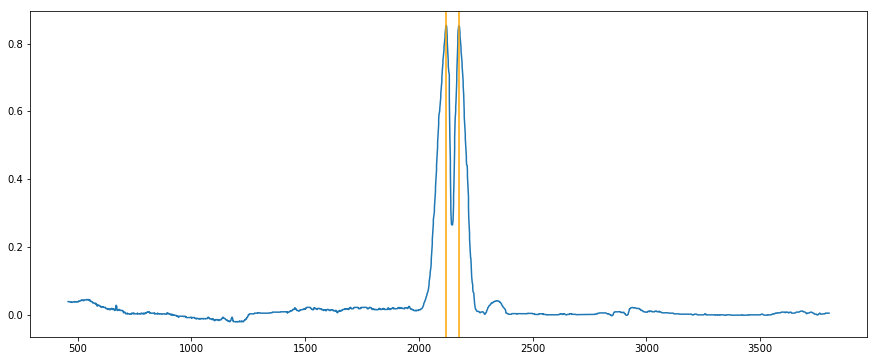

In [126]:
fig = plt.figure(figsize=(15,6))
plt.plot(x_data, y_data)
for i in peak_list[0]:
    plt.axvline(x=x_data[i], color='orange')

In [127]:
# assign parameters for least squares fit
mod, pars = spectrafit.lorentz_params(peaks)

In [128]:
# fit the model to the data
out = spectrafit.model_fit(x_data, y_data, mod, pars, report=True)

[[Model]]
    (Model(lorentzian, prefix='p1_') + Model(lorentzian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 122
    # data points      = 3574
    # variables        = 8
    chi-square         = 2.22664863
    reduced chi-square = 6.2441e-04
    Akaike info crit   = -26363.4906
    Bayesian info crit = -26314.0391
[[Variables]]
    p1_sigma:      26.8455697 (init = 1)
    p1_center:     2109.85482 (init = 2119.855)
    p1_amplitude:  66.7432667 (init = 1)
    p1_fwhm:       53.6911395 == '2.0000000*p1_sigma'
    p1_height:     0.85332386 (init = 0.8533239)
    p2_sigma:      21.0357688 (init = 1)
    p2_center:     2183.58417 (init = 2176.035)
    p2_amplitude:  51.6566694 (init = 1)
    p2_fwhm:       42.0715377 == '2.0000000*p2_sigma'
    p2_height:     0.85240108 (init = 0.8524011)



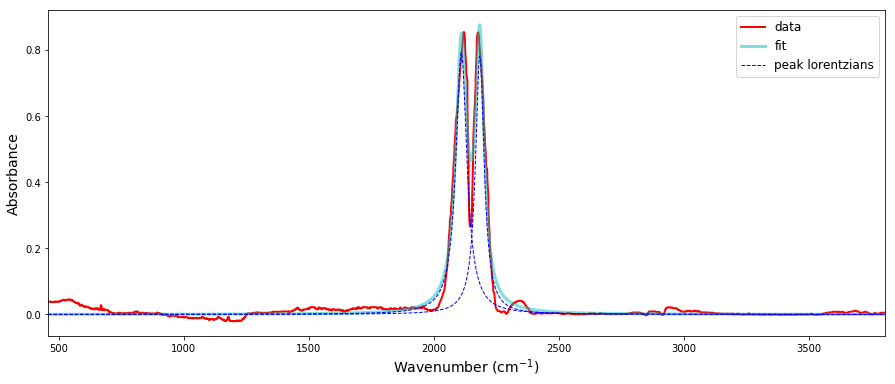

In [129]:
# plot fit results
spectrafit.plot_fit(x_data, y_data, out, plot_components=True)

In [130]:
# export data in logical structure (see docstring)
fit_peak_data = spectrafit.export_fit_data(out)
fit_peak_data

[array([2.68455697e+01, 2.10985482e+03, 6.67432667e+01, 5.36911395e+01,
        8.53323857e-01]),
 array([2.10357688e+01, 2.18358417e+03, 5.16566694e+01, 4.20715377e+01,
        8.52401079e-01])]

# complete fit wrapper

In [131]:
# def compound_report(compound):
#     data = shoyu_data_dict[compound]
#     x_data = data['x']
#     y_data = data['y']
#     # subtract baseline
#     y_data = spectrafit.subtract_baseline(y_data)
#     # detect peaks
#     peaks, peak_list = spectrafit.peak_detect(x_data, y_data)
#     # assign parameters for least squares fit
#     mod, pars = spectrafit.lorentz_params(peaks)
#     # fit the model to the data
#     out = spectrafit.model_fit(x_data, y_data, mod, pars)
#     # export data in logical structure (see docstring)
#     fit_peak_data = spectrafit.export_fit_data(out)
#     peak_centers = []
#     for i in range(len(fit_peak_data)):
#         peak_centers.append(fit_peak_data[i][1])
#     return peak_centers

In [132]:
# peaks = peak_report('CARBON MONOXIDE')

In [133]:
# peaks

In [134]:
# def data_report(x_data, y_data):
#     # subtract baseline
#     y_data = spectrafit.subtract_baseline(y_data)
#     # detect peaks
#     peaks, peak_list = spectrafit.peak_detect(x_data, y_data)
#     # assign parameters for least squares fit
#     mod, pars = spectrafit.lorentz_params(peaks)
#     # fit the model to the data
#     out = spectrafit.model_fit(x_data, y_data, mod, pars)
#     # export data in logical structure (see docstring)
#     fit_peak_data = spectrafit.export_fit_data(out)
#     peak_centers = []
#     for i in range(len(fit_peak_data)):
#         peak_centers.append(fit_peak_data[i][1])
#     return peak_centers